### はじめてのニューラルネットワーク：分類問題の初歩
https://www.tensorflow.org/tutorials/keras/classification?hl=ja

2.5.0
(60000, 28, 28)


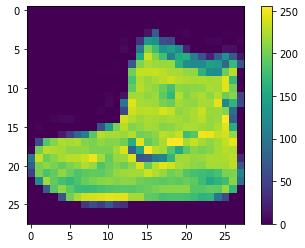

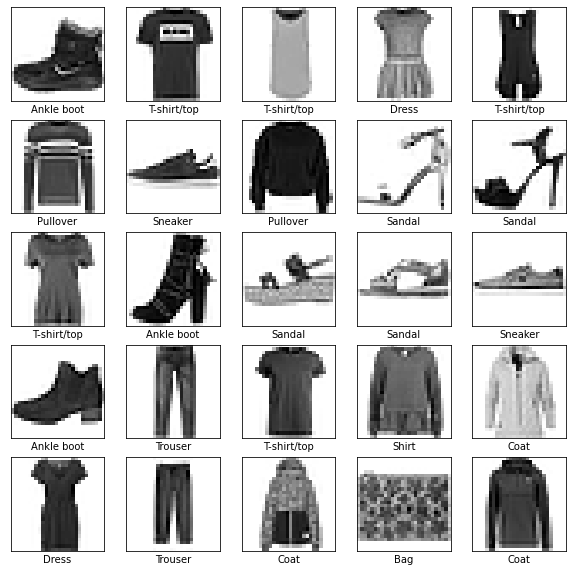

Epoch 1/5
1875/1875 [==============================] - 2s 894us/step - loss: 0.4926 - accuracy: 0.8275 - ETA: 1s - loss: 0.6563 - accuracy: 0.7694

In [47]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

# train:60,000枚 test:10,000枚
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)

# 画像をフルカラーで確認
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# スケール正規化 (255色を0~1の範囲にする)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 画像をグレースケールで25枚確認
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # グレースケールで表示
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# model構築
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28×28ピクセルの2次元配列から784の1次元配列に変換
    keras.layers.Dense(128, activation='relu'), # 784 => 128
    keras.layers.Dense(10, activation='softmax') # 128 => 10 # 合計が1になる10個の確率値
])

# optimizer,loss,metrics などレイヤーに関係ない設定をcompileとしてここで一気に設定
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

313/313 - 0s - loss: 0.3617 - accuracy: 0.8717

Test accuracy: 0.8716999888420105
[4.8059006e-05 4.9883278e-07 3.8128310e-06 5.4110149e-07 1.8911620e-06
 5.7458974e-02 3.5264286e-05 1.3553625e-01 1.0282673e-05 8.0690438e-01]
Ankle boot


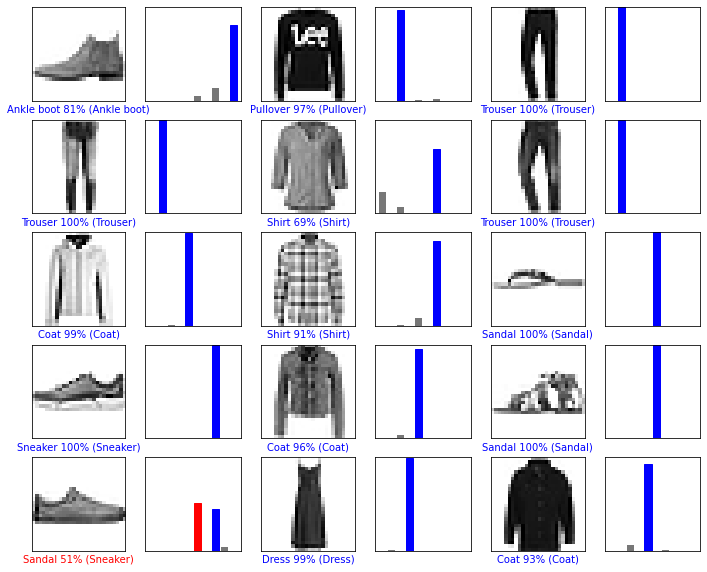

In [48]:
# 評価
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 予測
predictions = model.predict(test_images)
# 各衣料品に対しての確率の配列
print(predictions[0])
# 最も確率が高いやつ
print(class_names[np.argmax(predictions[0])])

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 正誤 可視化 (正:青 誤:赤)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

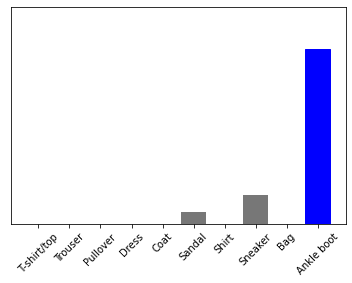

In [49]:
#
# tips
#

# 1枚の画像の予測でも、配列にする必要がある
img = test_images[0]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)